In [2]:
# 🔧 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score

In [3]:
df = pd.read_csv("kiranaRO_train.csv")
data = df.copy()

Shape of dataset: (433527, 8)

Data Types:
 InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Missing Values:
 InvoiceNo           0
StockCode           0
Description      1162
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     107957
Country             0
dtype: int64

Basic Stats:
        InvoiceNo StockCode                         Description       Quantity   
count     433527    433527                              432365  433527.000000  \
unique     24622      4019                                4148            NaN   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER            NaN   
freq         875      1847                                1894            NaN   
mean         NaN       NaN                                 NaN       9.590586   
std          NaN       NaN                        

C:\Users\tyagi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


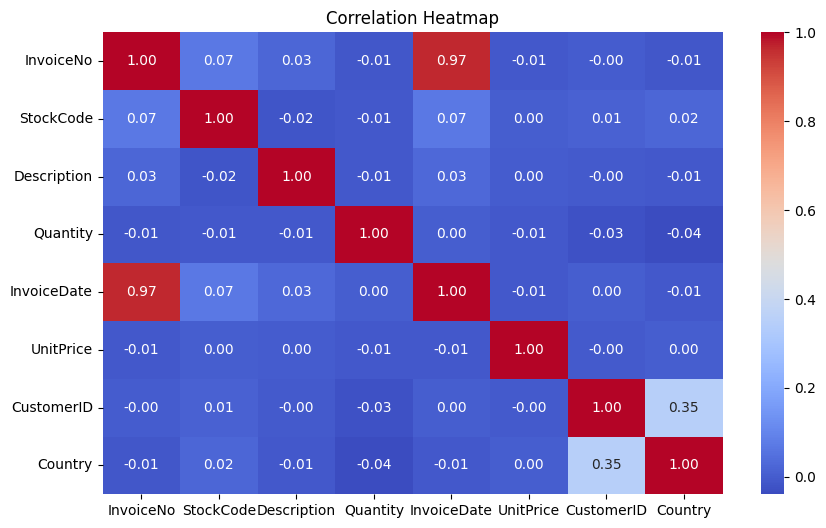

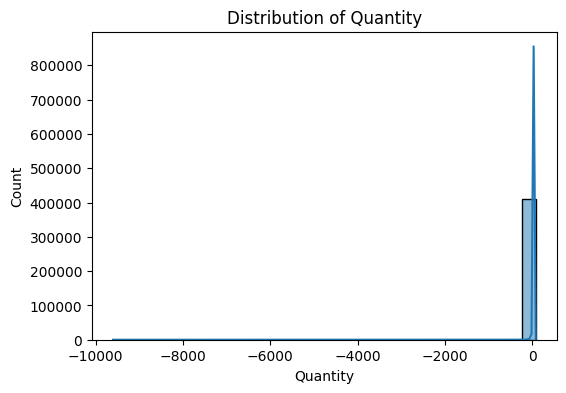

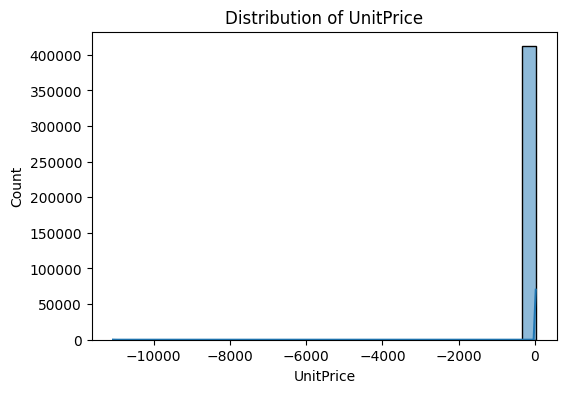

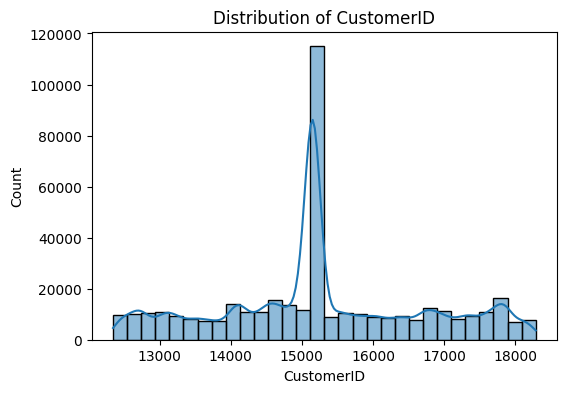

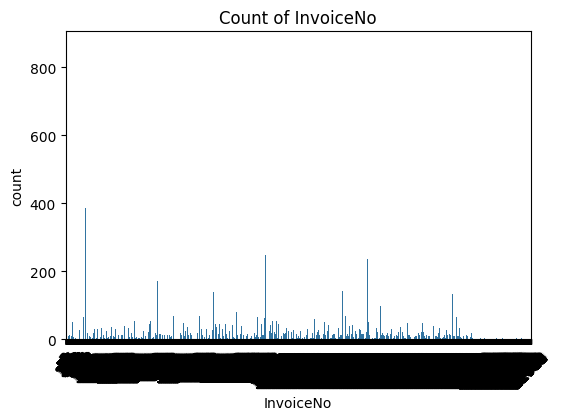

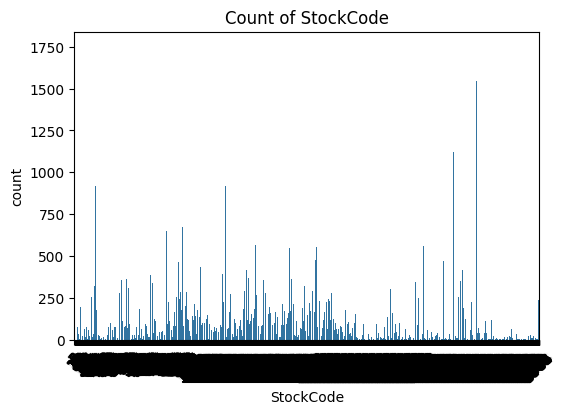

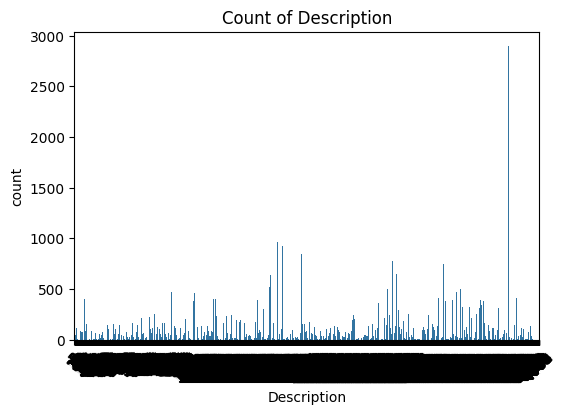

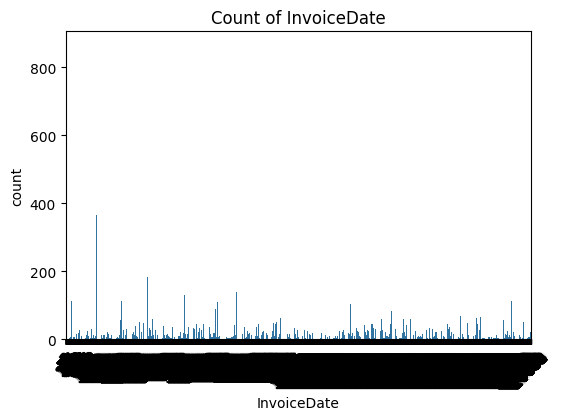

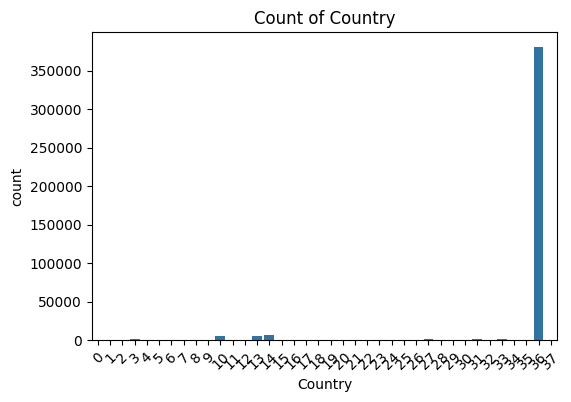


Cleaned DataFrame shape: (411850, 8)
   InvoiceNo  StockCode  Description  Quantity  InvoiceDate  UnitPrice   
0      16449       1076          296 -0.000723        17297   0.110260  \
1      11579       1680         3512  0.193141        12212  -0.101432   
2       2168       2740         1225  0.580870         2282  -0.124318   
5      16278       1972         1801 -0.162277        17141  -0.078547   
6      14895       1026         2378 -0.162277        15723  -0.004168   

   CustomerID  Country  
0    1.480969       36  
1   -0.242219       10  
2   -0.475138       36  
5   -0.758900       36  
6   -1.728365       36  


In [ ]:

# 📌 1. Overview of the data
print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nBasic Stats:\n", df.describe(include='all'))

# 📌 2. Handling Missing Values
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Impute numerical features with median
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Impute categorical features with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# 📌 3. Remove outliers using Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
outliers = iso.fit_predict(df[num_cols])

# Keep only non-outliers (where value is 1)
df = df[outliers == 1]

# 📌 4. Encode categorical features
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder for inverse_transform if needed

# 📌 5. Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 📌 6. Distribution plots for numerical features
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# 📌 7. Bar plot for categorical features
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()

# 📌 8. Feature scaling (optional)
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# ✅ Final cleaned data
print("\nCleaned DataFrame shape:", df.shape)
print(df.head())


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score

# 🧼 Load Dataset
df = pd.read_csv("kiranaRO_train.csv")
data = df.copy()

# 🧹 Drop Irrelevant Columns
data.drop(columns=['InvoiceNo', 'StockCode', 'Description'], inplace=True)

# 🗓️ Feature Engineering on InvoiceDate
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')
data['InvoiceMonth'] = data['InvoiceDate'].dt.month
data['InvoiceDay'] = data['InvoiceDate'].dt.day
data['InvoiceHour'] = data['InvoiceDate'].dt.hour
data.drop(columns='InvoiceDate', inplace=True)

# 🛠️ Missing Value Imputation
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = data.select_dtypes(include=['object']).columns.tolist()

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

data[num_cols] = num_imputer.fit_transform(data[num_cols])
data[cat_cols] = cat_imputer.fit_transform(data[cat_cols])

# 🔤 Encode Categorical Variables
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

# 🚫 Remove Outliers with Isolation Forest
iso = IsolationForest(contamination=0.02, random_state=42)
outlier_pred = iso.fit_predict(data[num_cols])
data = data[outlier_pred == 1]

# 🎯 Create Target Variable
threshold = data['Quantity'].quantile(0.95)
data['target'] = (data['Quantity'] > threshold).astype(int)
data.drop(columns=['Quantity'], inplace=True)

# 🧪 Train-Test Split
X = data.drop(columns='target')
y = data['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 🤖 Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# 📊 Train & Evaluate
for name, model in models.items():
    print(f"\n🚀 Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    print("F1 Score:", f1_score(y_test, y_pred))
    print("AUC-ROC:", roc_auc_score(y_test, y_prob))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

C:\Users\tyagi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



🚀 Model: Logistic Regression
F1 Score: 0.0
AUC-ROC: 0.7495481345244169
Confusion Matrix:
 [[80957     0]
 [ 4016     0]]


C:\Users\tyagi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tyagi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tyagi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     80957
           1       0.00      0.00      0.00      4016

    accuracy                           0.95     84973
   macro avg       0.48      0.50      0.49     84973
weighted avg       0.91      0.95      0.93     84973


🚀 Model: Random Forest
F1 Score: 0.4949308755760368
AUC-ROC: 0.9063962906480234
Confusion Matrix:
 [[80074   883]
 [ 2405  1611]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     80957
           1       0.65      0.40      0.49      4016

    accuracy                           0.96     84973
   macro avg       0.81      0.70      0.74     84973
weighted avg       0.96      0.96      0.96     84973


🚀 Model: Gradient Boosting
F1 Score: 0.12707056954844564
AUC-ROC: 0.8543944935575706
Confusion Matrix:
 [[80846   111]
 [ 3736   280]]
Classification Report:
        